# EE4414 Week 4 Face Recognition

Name: Ho Yingjie

Matriculation No: U1621969K

Tutorial Session: F33

In [663]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import cv2

# read dataset/preprocessing

In [664]:
#function for resizing image
def img_resize(img_array, img_size):

    new_array = cv2.resize(img_array, (img_size, img_size))
    
    return new_array

In [665]:
#function for preprocessing image
def preprocess(DATADIR, labels, img_size):
    
    features=[]
    y_labels=[]
    img_list=[]
    label_list=[]
    
    img_count=0
    for label in labels:
        path = os.path.join(DATADIR, label)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), 0) #load img in grayscale
            new_array = img_resize(img_array, img_size)
            cv2.imwrite(str(label)+'_'+str(img_count+1)+'.png', new_array) #save resized img
            img_list.append(new_array)
            label_list.append(str(label))
            plt.imshow(new_array)
            plt.show() #display all images in dataset
            img_count+=1
        features.append(img_list)
        y_labels.append(label_list)
        img_list = []
        label_list = []
    
    feature1, feature2 = features #1st feature/label: jiahui, 2nd feature/label: yingjie 
    label1, label2 = y_labels
        
    #split dataset for 'jiahui' to 50% trainset & 50% testset
    X_train1, X_test1, y_train1, y_test1 = train_test_split(feature1, label1, train_size=0.5, shuffle=True, random_state=42)  
    #split dataset for 'yingjie' to 50% trainset & 50% testset
    X_train2, X_test2, y_train2, y_test2 = train_test_split(feature2, label2, train_size=0.5, shuffle=True, random_state=42)

    
    X_train1 = np.array(X_train1)
    X_train2 = np.array(X_train2)
    X_test1 = np.array(X_test1)
    X_test2 = np.array(X_test2)
    y_train1 = np.array(y_train1)
    y_train2 = np.array(y_train2)
    y_test1 = np.array(y_test1)
    y_test2 = np.array(y_test2)
     (20 total)
    #each trainset & testset contains 10 'jiahui' & 10 'yingjie' images (20 total)
    features_train=np.concatenate([X_train1, X_train2]) #concat 'jiahui' & 'yingje' train images 
    labels_train=np.concatenate([y_train1,y_train2]) #concat 'jiahui' & 'yingjie' train labels
    features_test=np.concatenate([X_test1, X_test2]) #concat 'jiahui' & 'yingjie' test images
    labels_test=np.concatenate([y_test1,y_test2]) #concat 'jiahui' & 'yingjie' test labels

    features_train = np.reshape(features_train, (20,1024))
    features_test_reshaped = np.reshape(features_test, (20,1024)) # reshape train & test images from 20x32x32 dim to
                                                                  # 20 samples x 1024 features
    
    return features_train, labels_train, features_test, labels_test, features_test_reshaped
    

# main code

Accuracy Score:  0.95 



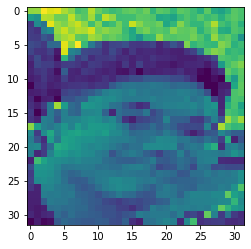

ground truth:  Jiahui
predicted:  Jiahui




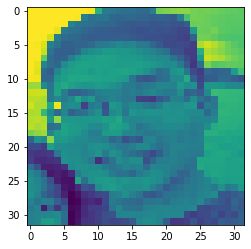

ground truth:  Jiahui
predicted:  Jiahui




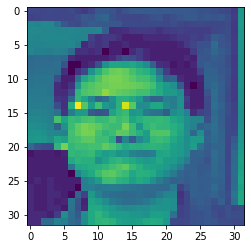

ground truth:  Jiahui
predicted:  Jiahui




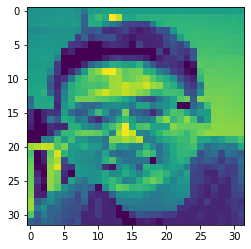

ground truth:  Jiahui
predicted:  Jiahui




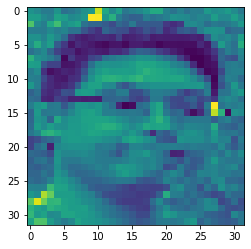

ground truth:  Jiahui
predicted:  Jiahui




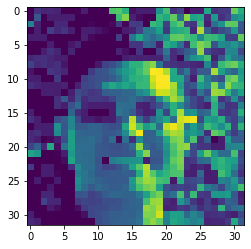

ground truth:  Jiahui
predicted:  Jiahui




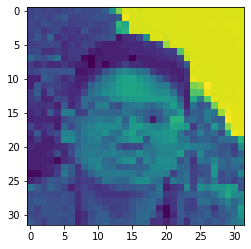

ground truth:  Jiahui
predicted:  Jiahui




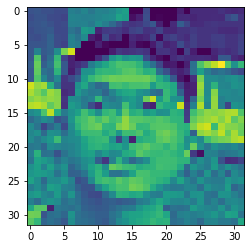

ground truth:  Jiahui
predicted:  Jiahui




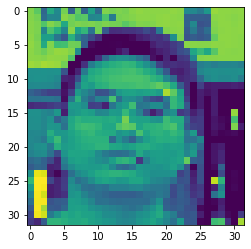

ground truth:  Jiahui
predicted:  Jiahui




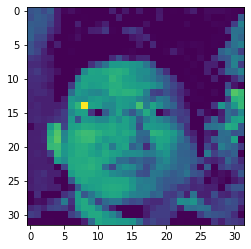

ground truth:  Jiahui
predicted:  Jiahui




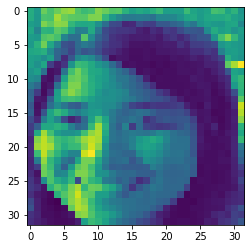

ground truth:  Yingjie
predicted:  Jiahui




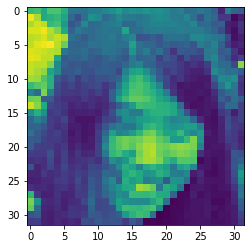

ground truth:  Yingjie
predicted:  Yingjie




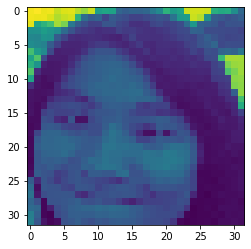

ground truth:  Yingjie
predicted:  Yingjie




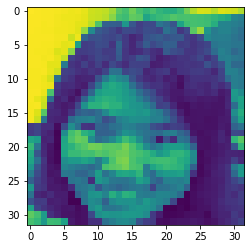

ground truth:  Yingjie
predicted:  Yingjie




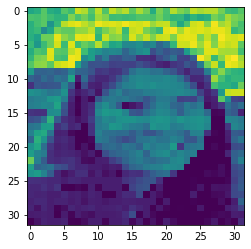

ground truth:  Yingjie
predicted:  Yingjie




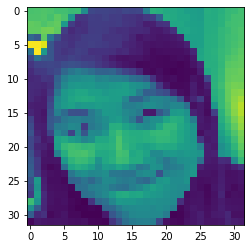

ground truth:  Yingjie
predicted:  Yingjie




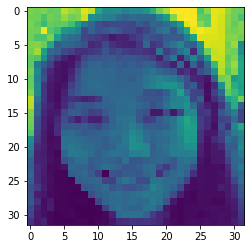

ground truth:  Yingjie
predicted:  Yingjie




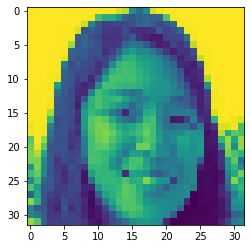

ground truth:  Yingjie
predicted:  Yingjie




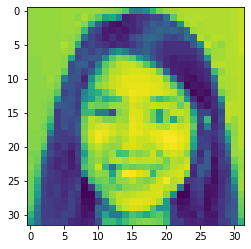

ground truth:  Yingjie
predicted:  Yingjie




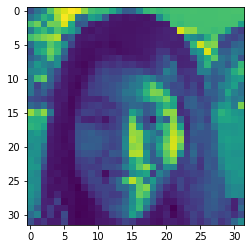

ground truth:  Yingjie
predicted:  Yingjie




In [666]:
if __name__ == "__main__":
    DATADIR = '/home/yingjie/ee4414/week4_face/EE4414 Dataset' #image dataset directory
    labels = ['Jiahui', 'Yingjie'] #labels
    img_size=32 #resize image size
    
    features_train, labels_train, features_test, labels_test, features_test_reshaped = preprocess(DATADIR, labels, img_size)
    
    #train multi-layer perceptron classifier
    # classifier with 3 hidden layers & 10 neurons per layer, activation function='tanh', optimization function='lfbgs'
    clf = MLPClassifier(hidden_layer_sizes=(10,3), activation='tanh', solver='lbfgs', random_state=None)
                        
    clf.fit(features_train, labels_train) #fit training set(features_train, labels_train)
    y_predict = clf.predict(features_test_reshaped) #predict test images (features_test_reshaped)
    print('Accuracy Score: ', clf.score(features_test_reshaped, labels_test), '\n') #accuracy score
    
    #dsiplay predictions
    count=0
    for test_img in features_test:
        plt.imshow(test_img)
        plt.show()
        print('ground truth: ', labels_test[count])
        print('predicted: ', y_predict[count])
        print('\n')
        count+=1